In [1]:
# import modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC as svc
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:


# Read the text file into a list of lines
with open("all_positive_8500.txt", encoding="utf-8") as f:
    lines = f.readlines()

# Create a DataFrame from the list of lines
positive_df = pd.DataFrame(lines, columns=["text"])

# Remove leading and trailing whitespace from each line
positive_df["text"] = positive_df["text"].str.strip()


# 1. Counting the number of dramas
number_of_dramas = positive_df["text"].nunique()
print("Number of dramas:", number_of_dramas)



# 2. Identifying the most frequently mentioned dramas
drama_counts = positive_df["text"].value_counts()
print("Most frequently mentioned dramas:")
print(drama_counts.head())


Number of dramas: 7698
Most frequently mentioned dramas:
অসাধারণ নাটক         57
অসাধারণ              53
এক কথায় অসাধারণ      38
অসাধারণ একটা নাটক    31
অসাধারন নাটক         27
Name: text, dtype: int64


In [3]:
positive_df.head()

,text
0,অসাধারণ নিশো বস্ আর অমি ভাইকেও।
1,আমার দেখা বেস্ট নাটক
2,"নাটক টা অনেক সুন্দর হয়েছে,,,,আফরান নিশো ভাইয়..."
3,সত্যি অসাধারণ একটি রিলেশন
4,মজা পাইছি ভাষা গুলো কেমন লাগলো


In [4]:
positive_df["label"] = "positive"
positive_df.head()


,text,label
0,অসাধারণ নিশো বস্ আর অমি ভাইকেও।,positive
1,আমার দেখা বেস্ট নাটক,positive
2,"নাটক টা অনেক সুন্দর হয়েছে,,,,আফরান নিশো ভাইয়...",positive
3,সত্যি অসাধারণ একটি রিলেশন,positive
4,মজা পাইছি ভাষা গুলো কেমন লাগলো,positive


In [5]:
# Read the text file into a list of lines 
with open("all_negative_3307.txt", encoding="utf-8") as f:
    lines = f.readlines()

# Create a DataFrame from the list of lines
negative_df = pd.DataFrame(lines, columns=["text"])  

# Remove leading and trailing whitespace from each line
negative_df["text"] = negative_df["text"].str.strip()

# 1. Counting the number of dramas
number_of_dramas = negative_df["text"].nunique()
print("Number of dramas:", number_of_dramas)

# 2. Identifying the most frequently mentioned dramas
drama_counts = negative_df["text"].value_counts()
print("Most frequently mentioned dramas:")
print(drama_counts.head())

Number of dramas: 3058
Most frequently mentioned dramas:
ফালতু নাটক         100
বালের নাটক          53
ফালতু একটা নাটক     23
বাজে নাটক           13
ফালতু নাটক।          7
Name: text, dtype: int64


In [6]:
negative_df.head()

,text
0,আমার জীবনের সবথেকে ফালতু একটা নাটক এইটা
1,সাধারণ মানুষ টিভি চ্যানেল গুলো ছুড়ে ফেলে দিয়ে...
2,স্টুডেন্ট ওরে একটা থাপ্পড় মারো
3,নাটকটিতে কথা থেকে মিউজিকের সাউন্ডটা বেশি হয়ে গ...
4,পাকনা মেয়াটা একটা বাজে


In [7]:
negative_df['label']="negative"
negative_df.head()

,text,label
0,আমার জীবনের সবথেকে ফালতু একটা নাটক এইটা,negative
1,সাধারণ মানুষ টিভি চ্যানেল গুলো ছুড়ে ফেলে দিয়ে...,negative
2,স্টুডেন্ট ওরে একটা থাপ্পড় মারো,negative
3,নাটকটিতে কথা থেকে মিউজিকের সাউন্ডটা বেশি হয়ে গ...,negative
4,পাকনা মেয়াটা একটা বাজে,negative


In [8]:
df = pd.concat([positive_df, negative_df], ignore_index=True)

In [9]:
df.head()

,text,label
0,অসাধারণ নিশো বস্ আর অমি ভাইকেও।,positive
1,আমার দেখা বেস্ট নাটক,positive
2,"নাটক টা অনেক সুন্দর হয়েছে,,,,আফরান নিশো ভাইয়...",positive
3,সত্যি অসাধারণ একটি রিলেশন,positive
4,মজা পাইছি ভাষা গুলো কেমন লাগলো,positive


In [10]:
# Save DataFrame to CSV
df.to_csv('dataset.csv', index=False)

In [11]:

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
def preprocess_text(text):
    
    # Remove non-alphabetic characters
    text = "".join([char for char in text if char.isalpha() or char.isspace()])

    # Remove extra whitespace
    text = text.strip()

    # Load Bengali stopwords
    stop_words = stopwords.words("bengali")
    
    # Tokenize the text and remove stop words
    text = " ".join([word for word in word_tokenize(text) if word not in stop_words])
    
    return text

df["text"] = df["text"].apply(preprocess_text)

In [13]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label']) # positive -> 1, negative -> 0

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])

# Extract labels
y = df['label']

In [15]:
X

<11807x13740 sparse matrix of type '<class 'numpy.float64'>'
	with 113827 stored elements in Compressed Sparse Row format>

In [16]:
y.value_counts()

1    8500
0    3307
Name: label, dtype: int64

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SUPPORT VECTOR MACHINE

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Initialize and train the model
svm = SVC(class_weight={0:2., 1:1.})
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy_svc=accuracy_score(y_test, y_pred)
accuracy_svc = accuracy_svc*100
print('Accuracy of the model is {0:.2f}%'.format(accuracy_svc))

Accuracy of the model is 93.78%


In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f'Classification Report:\n{classification_report(y_test,y_pred)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       649
           1       0.95      0.96      0.96      1713

    accuracy                           0.94      2362
   macro avg       0.93      0.92      0.92      2362
weighted avg       0.94      0.94      0.94      2362



In [21]:
confusion_m=confusion_matrix(y_test,y_pred)
confusion_m


array([[ 565,   84],
       [  63, 1650]], dtype=int64)

<AxesSubplot:>

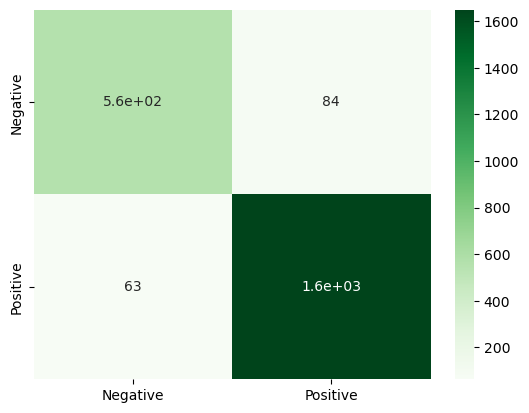

In [22]:
x_axis_labels = ['Negative', 'Positive']
y_axis_labels = ['Negative', 'Positive']


sns.heatmap(confusion_m, annot=True, cmap='Greens',  xticklabels=x_axis_labels, yticklabels=y_axis_labels)


In [23]:
import joblib  # Add this line to import joblib

# Save the model and vectorizer
joblib.dump(svm, 'Bangla_Drama_Comment_Analysis_SVM.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# To load the model and vectorizer
model = joblib.load('Bangla_Drama_Comment_Analysis_SVM.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')



In [24]:
# positive -> 1, negative -> 0
def predict_comment(comment):
    processed_comment = preprocess_text(comment)
    features = vectorizer.transform([processed_comment])
    prediction = svm.predict(features)
    return prediction[0]

# Example
new_comment = " স্টুডেন্ট মেয়েটা নাটকটাকে বিরক্তিকর  বানিয়েছে.."
print(f'Prediction: {predict_comment(new_comment)}')

Prediction: 0


In [25]:
# positive -> 1, negative -> 0
def predict_comment(comment):
    processed_comment = preprocess_text(comment)
    features = vectorizer.transform([processed_comment])
    prediction = svm.predict(features)
    return prediction[0]

# Example
new_comment = " স্টুডেন্ট মেয়েটা নাটকটাকে ভাল বানিয়েছে.."
print(f'Prediction: {predict_comment(new_comment)}')

Prediction: 0
